In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'data\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


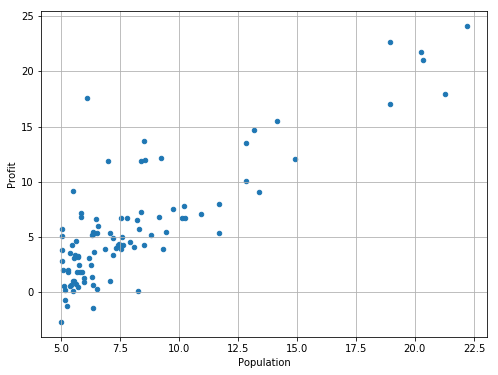

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', grid=True, figsize=(8,6))

In [5]:
data.insert(0, 'ones', 1)

In [6]:
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
X = data.iloc[:,:2]

In [8]:
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y = data.iloc[:,-1:]

In [10]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [11]:
m = len(X)

In [12]:
m

97

In [13]:
theta = np.zeros((2, 1))
iteration = 1500
alpha = 0.01

In [14]:
theta

array([[ 0.],
       [ 0.]])

In [15]:
X.shape, theta.shape, y.shape

((97, 2), (2, 1), (97, 1))

In [16]:
theta

array([[ 0.],
       [ 0.]])

In [17]:
X = np.mat(X)
y = np.mat(y)

In [18]:
def computeCost(X, y, theta):
    inner = np.power((X * theta - y), 2)
    return np.sum(inner)/(2 * len(X))

In [20]:
(X * theta - y).shape

(97, 1)

In [21]:
computeCost(X, y, theta)

32.072733877455676